In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import urllib.parse
%matplotlib inline

In [2]:
#Function that will extract Input URL based on Features
#NumDots, SubdomainLevel, PathLevel, UrlLength, NumDash, AtSymbol, 
#TildeSymbol, NumUnderscore, NumPercent, NumAmpersand, NumHash, NumNumericChars, NoHttps

def extract_url_features(url):
    parsed_url = urllib.parse.urlparse(url)
    #Count the Number of Dots
    num_dots = url.count('.')
    # Extract the SubdomainLevel feature
    subdomain = parsed_url.netloc.split('.')
    subdomain_level = len(subdomain) - 2  # Subtract 2 to exclude the top-level domain
    # Extract the PathLevel feature
    path_level = url.count('/')
    #Count the Length of the URL
    url_length = len(url)
    #Count the Number of Dash in the URL
    num_dash = url.count('-')
    #Count the @ Symbol in the URL
    at_symbol = int('@' in url)
    #Count the ∼ Symbol in the URL
    tilde_symbol = int('~' in url)
    #Count the _ Symbol in the URL
    num_underscore = url.count('_')
    #Count the % Symbol in the URL
    num_percent = url.count('%')
    #Count the & Symbol in the URL
    num_ampersand = url.count('&')
    #Count the number of # in the URL
    num_hash = url.count('#')
    #Count the numbers in the URL
    num_numeric_chars = sum(c.isdigit() for c in url)
    #Check if the URL HTTP is Secured
    no_https = int(not url.startswith("https://"))
    
    return {
        "NumDots": num_dots,
        "SubdomainLevel": subdomain_level,
        "PathLevel": path_level,
        "UrlLength": url_length,
        "NumDash": num_dash,
        "AtSymbol": at_symbol,
        "TildeSymbol": tilde_symbol,
        "NumUnderscore": num_underscore,
        "NumPercent": num_percent,
        "NumAmpersand": num_ampersand,
        "NumHash": num_hash,
        "NumNumericChars": num_numeric_chars,
        "NoHttps": no_https
    }

In [3]:
#Function that will assess whether URL is Phishing or not based on Model
def predict_url_legitimacy(url, model):
    features = extract_url_features(url)
    prediction = model.predict([list(features.values())])
    return prediction[0]

In [4]:
df = pd.read_csv('Phishing_Legitimate_full.csv')

In [5]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [7]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

id has 10000 unique values
NumDots has 17 unique values
SubdomainLevel has 13 unique values
PathLevel has 18 unique values
UrlLength has 226 unique values
NumDash has 25 unique values
NumDashInHostname contains:			[0 1 2 4 3 5 7 6 9 8]
AtSymbol contains:			[0 1]
TildeSymbol contains:			[0 1]
NumUnderscore has 16 unique values
NumPercent has 14 unique values
NumQueryComponents has 19 unique values
NumAmpersand has 16 unique values
NumHash contains:			[0 1]
NumNumericChars has 82 unique values
NoHttps contains:			[1 0]
RandomString contains:			[0 1]
IpAddress contains:			[0 1]
DomainInSubdomains contains:			[0 1]
DomainInPaths contains:			[0 1]
HttpsInHostname contains:			[0]
HostnameLength has 74 unique values
PathLength has 147 unique values
QueryLength has 164 unique values
DoubleSlashInPath contains:			[0 1]
NumSensitiveWords contains:			[0 1 2 3]
EmbeddedBrandName contains:			[0 1]
PctExtHyperlinks has 2510 unique values
PctExtResourceUrls has 1489 unique values
ExtFavicon contains:

In [8]:
#Drop ID as it is only a label and does not hold significance to the model
df = df.drop(columns=['id'])

In [9]:
#Modeling
#Identifying the target variable and its predictors/features
target = df['CLASS_LABEL']
features = df[['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps']]

#Split dataset into training and data set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.34, random_state=42)

In [10]:
#Making the random forest model
rf_model = RandomForestClassifier()

In [11]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
rf_pred = rf_model.predict(X_test)

In [13]:
rf_accuracy = accuracy_score(y_test, rf_pred)

In [14]:
print("Random Forest Accuracy:", rf_accuracy)
#The Accuracy was lower compared to our WEKA analysis. This is due to limited feature constraints as certain features were only chosen

Random Forest Accuracy: 0.8803293149073802


In [15]:
# Create a confusion matrix for the Random Forest model
conf_matrix = confusion_matrix(y_test, rf_pred)

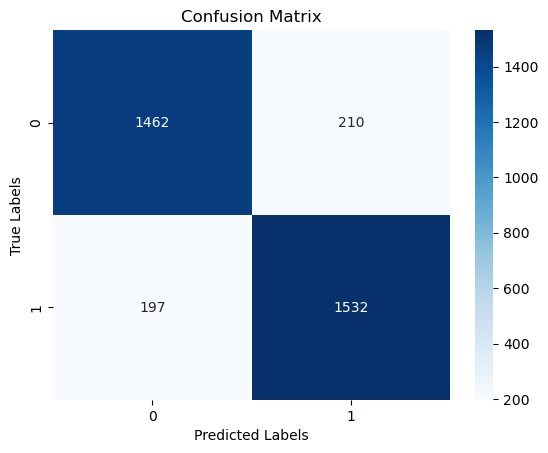

In [16]:
# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [17]:
#Predicting New Data

#Phishing Links
    #http://empty-boat-5019.dgentile8443.workers.dev/
    #http://ssh.si4gn5al6mobikdicjhdbmiloh.cc/
#Legitimate Website
    #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    #https://www.youtube.com/watch?v=dQw4w9WgXcQ


url_to_test = "https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html"
prediction = predict_url_legitimacy(url_to_test, rf_model)

C:\Users\Jonathan Juanillo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
if prediction == 1:
    print(f"The URL '{url_to_test}' is predicted as legitimate.")
else:
    print(f"The URL '{url_to_test}' is predicted as potentially phishing.")

The URL 'https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html' is predicted as legitimate.
